### Import

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)

### Load data

In [499]:
df = pd.read_csv('data/clean_df.csv')

In [463]:
df.head(100)

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,health_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance,category,state,company_rank
0,Google,Internet,35,3,19400.0,43800.0,1900.0,13000.0,4700.0,https://www.google.com/,Public,8,"Mountain View, CA",1998.0,0.61,0.15,0.23,3.3,4.7,4.5,13,1,1,1,1,1,1,1,1,1,1,1,1,1,7,0,1,1,0,1,1,1,1,1,8,1,1,0,0,1,1,1,1,1,1,5,1,1,1,1,0,1,11,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,0,1,Information Technology,CA,2
1,Microsoft,Computer Hardware & Software,34,3,30300.0,68800.0,5700.0,10000.0,10000.0,https://www.microsoft.com/,Public,8,"Redmond, WA",1975.0,0.65,0.13,0.21,3.1,4.5,4.4,12,1,1,1,1,1,1,1,1,1,1,1,0,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1,Information Technology,WA,2
2,Apple,Computer Hardware & Software,25,3,21600.0,63600.0,4200.0,8500.0,7100.0,https://www.apple.com/,Public,8,"Cupertino, CA",1976.0,0.65,0.15,0.20,3.0,4.5,4.3,12,1,1,1,1,1,1,1,1,1,0,1,1,1,7,0,1,1,1,0,1,1,1,1,9,1,1,1,1,1,1,0,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,4,1,1,1,0,1,Information Technology,CA,2
3,US Air Force,Federal Agencies,40,3,17100.0,19400.0,4800.0,1000.0,7600.0,https://www.af.mil/,Government,8,"Washington, DC",1947.0,0.70,0.05,0.24,2.2,4.5,4.2,11,1,1,0,1,0,1,1,1,1,1,1,1,1,4,1,1,1,0,0,0,0,1,0,9,1,0,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,10,1,1,1,1,1,0,1,1,1,1,1,5,1,1,1,1,1,Goverment,DC,2
4,Cisco Systems,Computer Hardware & Software,25,3,22400.0,42500.0,1900.0,4300.0,8000.0,https://www.cisco.com/,Private,8,"San Jose, CA",1984.0,0.69,0.11,0.19,3.0,4.2,4.2,13,1,1,1,1,1,1,1,1,1,1,1,1,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,0,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1,Information Technology,CA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Duke University,Colleges & Universities,4,3,2000.0,3300.0,1200.0,245.0,502.0,https://www.hr.duke.edu/,Education,6,"Durham, NC",1838.0,0.80,0.05,0.16,2.6,4.2,4.4,11,1,1,1,1,1,1,1,1,1,0,1,0,1,2,0,1,1,0,0,0,0,0,0,4,1,1,0,0,0,0,1,0,1,0,4,1,1,1,0,0,1,4,1,1,0,1,0,0,0,0,1,0,0,4,1,1,1,0,1,Education,NC,2
96,University of Wisconsin-Madison,Colleges & Universities,2,3,2000.0,3200.0,5.0,218.0,555.0,https://www.jobs.wisc.edu/,Education,1,"Madison, WI",1848.0,0.77,0.08,0.14,2.5,4.0,4.4,11,1,1,1,1,1,1,1,1,1,0,1,0,1,4,1,0,1,0,0,0,1,0,1,3,0,0,0,0,1,0,0,0,1,1,3,1,1,1,0,0,0,5,1,1,1,0,0,0,0,0,1,0,1,4,1,1,1,0,1,Edu

In [362]:
df[df.company_rank == 0]['company_rank'].count()

761

In [363]:
df[df.company_rank == 1]['company_rank'].count()

915

In [364]:
df[df.company_rank == 2]['company_rank'].count()

545

### Set up X and y

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2221 non-null   object 
 1   industry                                      2221 non-null   object 
 2   office                                        2221 non-null   int64  
 3   size                                          2221 non-null   int64  
 4   review_counts                                 2221 non-null   float64
 5   salaries_count                                2221 non-null   float64
 6   jobs_count                                    2221 non-null   float64
 7   interviews_count                              2221 non-null   float64
 8   benefits_count                                2221 non-null   float64
 9   website                                       2221 non-null   o

In [500]:
df = pd.get_dummies(df, columns=['company_type','category'], drop_first = True)

In [501]:
X = df.drop(columns=['company_rank','rating','name','website','industry','founded',
                     'head_quarter', 'benefits_score','state', 'founded','review_counts','salaries_count',
                     'benefits_count','interview_possitive','interview_neutral','interview_negative',
                     'interview_neutral',
                    ])
y = df['company_rank']

features = X.columns

### Train/Test Split

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size = .4 )

### Standar Scalar the data

In [472]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [443]:
y.mean()

0.9027465105808195

In [444]:
X_train.shape

(1332, 97)

## checking model

### SVC

In [473]:
svc = SVC()
cross_val_score(svc,X,y,cv= 5).mean()

0.4615335560279381

### Random forest

In [474]:
rfc = RandomForestClassifier()
cross_val_score(rfc, X,y, cv=5).mean()

0.47593076222289704

### ADA boost

In [475]:
boost = AdaBoostClassifier()
cross_val_score(boost,X,y,cv=5).mean()

0.4975280898876404

In [476]:
boost = GradientBoostingClassifier()
cross_val_score(boost,X,y,cv=5).mean()

0.5123818200222694

### Logistic Regression

In [477]:
logr= LogisticRegression()
cross_val_score(logr,X,y,cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.45119141613523633

### Decicion Tree

In [478]:
tree = DecisionTreeClassifier()
cross_val_score(tree, X,y,cv=5).mean()

0.4214404291932382

### Extra tree

In [479]:
x_trees = ExtraTreeClassifier()
cross_val_score(x_trees, X,y,cv= 5).mean()

0.3800151837230489

### K-NN

In [480]:
knn = KNeighborsClassifier()
cross_val_score(knn, X,y,cv= 5).mean()

0.4079491851401964

In [481]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5668168168168168
Validation Score:  0.5095613048368954
[[161 119  26]
 [ 92 209  68]
 [ 24 107  83]]
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       306
           1       0.48      0.57      0.52       369
           2       0.47      0.39      0.42       214

    accuracy                           0.51       889
   macro avg       0.51      0.49      0.50       889
weighted avg       0.51      0.51      0.51       889



In [482]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', RandomForestClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  1.0
Validation Score:  0.5365579302587177
[[167 129  10]
 [ 70 258  41]
 [ 17 145  52]]
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       306
           1       0.48      0.70      0.57       369
           2       0.50      0.24      0.33       214

    accuracy                           0.54       889
   macro avg       0.55      0.50      0.50       889
weighted avg       0.55      0.54      0.52       889



In [483]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', GradientBoostingClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.7777777777777778
Validation Score:  0.5410573678290214
[[162 126  18]
 [ 76 248  45]
 [ 16 127  71]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58       306
           1       0.50      0.67      0.57       369
           2       0.53      0.33      0.41       214

    accuracy                           0.54       889
   macro avg       0.55      0.51      0.52       889
weighted avg       0.55      0.54      0.53       889



In [484]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', ExtraTreeClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  1.0
Validation Score:  0.39707536557930256
[[129 117  60]
 [107 149 113]
 [ 45  94  75]]
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       306
           1       0.41      0.40      0.41       369
           2       0.30      0.35      0.32       214

    accuracy                           0.40       889
   macro avg       0.39      0.39      0.39       889
weighted avg       0.40      0.40      0.40       889



In [485]:
boost = GradientBoostingClassifier()
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values
df_feat = feat.sort_values(by= 'values', ascending=False).head(20)

In [458]:
df_feat

,0,values
3,interviews_count,0.143894
6,interview_difficulty,0.143671
5,interview_negative,0.087915
81,category_Education,0.070164
2,jobs_count,0.059421
1,size,0.044626
0,office,0.043508
7,total_insurance_health_wellness_benefits,0.025833
49,total_perk_discounts_benefits,0.025348
4,revenue,0.024257


In [434]:
boost = AdaBoostClassifier()
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values
df_feat = feat.sort_values(by= 'values', ascending=False).head(20)

In [435]:
df_feat

,0,values
2,review_counts,0.12
10,interview_neutral,0.10
3,salaries_count,0.10
11,interview_difficulty,0.10
8,interview_possitive,0.06
9,interview_negative,0.06
4,jobs_count,0.04
47,total_vacation_time_off_benefits,0.02
28,plan_401K,0.02
83,category_Business Services,0.02


In [502]:
y_train.shape

(1332,)

In [503]:
X_train.shape

(1332, 96)

In [504]:
y = to_categorical(y)
y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Train/Test Split

In [505]:
X_train.shape

(1332, 96)

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.4 )

### Standar Scalar the data

In [507]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [489]:
2*2*2*2*2*2*2*2*2*2

1024

In [508]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(96,),
                activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [509]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [510]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512)

Epoch 1/30
3/3 [==============================] - 1s 94ms/step - loss: 1.2200 - accuracy: 0.2832 - val_loss: 1.1148 - val_accuracy: 0.3476
Epoch 2/30
3/3 [==============================] - 0s 20ms/step - loss: 1.1096 - accuracy: 0.3469 - val_loss: 1.0858 - val_accuracy: 0.4049
Epoch 3/30
3/3 [==============================] - 0s 18ms/step - loss: 1.0828 - accuracy: 0.4251 - val_loss: 1.0782 - val_accuracy: 0.4173
Epoch 4/30
3/3 [==============================] - 0s 20ms/step - loss: 1.0771 - accuracy: 0.4266 - val_loss: 1.0635 - val_accuracy: 0.4252
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 1.0516 - accuracy: 0.4532 - val_loss: 1.0498 - val_accuracy: 0.4297
Epoch 6/30
3/3 [==============================] - 0s 21ms/step - loss: 1.0347 - accuracy: 0.4734 - val_loss: 1.0416 - val_accuracy: 0.4544
Epoch 7/30
3/3 [==============================] - 0s 20ms/step - loss: 1.0192 - accuracy: 0.4989 - val_loss: 1.0376 - val_accuracy: 0.4736
Epoch 8/30
3/3 [===========

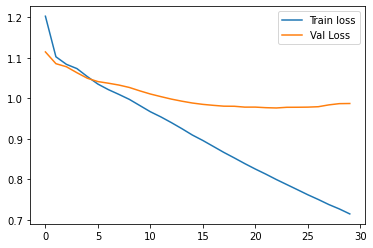

In [511]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

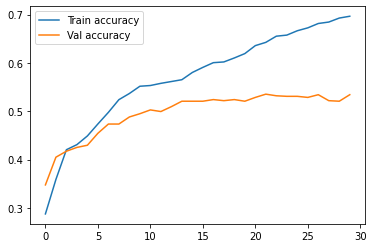

In [512]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [516]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [250]:
# lets tune it add more to params
def the_model(layer_one_neurons=32, layer_two_neurons = 32): # set default is 32
    print('layer_one_neurons', layer_one_neurons, 'layer_two_neurons', layer_two_neurons)
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape=(103,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
    return model

nn = KerasClassifier(build_fn = the_model, batch_size = 512, verbose=0) 
# verbose=0, so we don't print eopchs etc when we fit

params = {
    'epochs' : [10,20,30,50,100,200,300],
    'layer_one_neurons' : [5,10,22,44,100],
    'layer_two_neurons' : [10,11,50,100,200]
}
gs = GridSearchCV(nn, param_grid=params, cv=5) # <- only for teaching !! usualy 5 but it takes longtime
gs.fit(X_train_sc, y_train)
print(gs.best_score_)
gs.best_params_

layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50


layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200


layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11


layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100


layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10


layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100


layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10


layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50


layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200


layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11


layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200


layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11


layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100


layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10


layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50


layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10


layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50


layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200


layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11


layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100


layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11


layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100


layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10


layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50


layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200


layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50


layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200


layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11


layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100


layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10


layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100


layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10


layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50


layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200


layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11


layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200


layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11


layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100


layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10


layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50


layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10


layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50


layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200


layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11


layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100


layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11


layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100


layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10


layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50


layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200


layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50


layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200


layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11


layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100


layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10


layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100


layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10


layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50


layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200


layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11


layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200


layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11


layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100


layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10


layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50


layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10


layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50


layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200


layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 10
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 11


layer_one_neurons 5 layer_two_neurons 11
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 50
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100
layer_one_neurons 5 layer_two_neurons 100


layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 5 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 10
layer_one_neurons 10 layer_two_neurons 11


layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 11
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 50
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100


layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 100
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 10 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10


layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 10
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 11
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 50


layer_one_neurons 22 layer_two_neurons 50
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 100
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200
layer_one_neurons 22 layer_two_neurons 200


layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 10
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 11
layer_one_neurons 44 layer_two_neurons 50


layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 50
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 100
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200


layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 44 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 10
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11


layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 11
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 50
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 100


layer_one_neurons 100 layer_two_neurons 100
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 200
layer_one_neurons 100 layer_two_neurons 50
0.552131986618042


{'epochs': 30, 'layer_one_neurons': 100, 'layer_two_neurons': 50}

In [517]:
model = KerasClassifier()
model.add(Dense(32, 
                input_shape=(96,),
                activation='relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))                
model.add(Dense(3, activation='softmax'))

AttributeError: 'KerasClassifier' object has no attribute '__call__'

In [256]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=1028)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

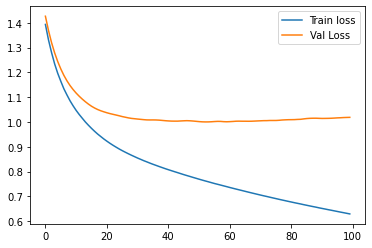

In [245]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

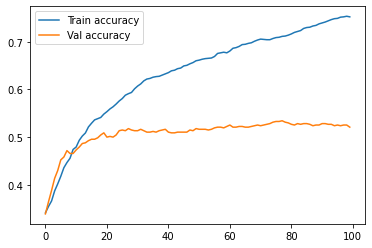

In [246]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();